<a href="https://colab.research.google.com/github/arand013/FinancialModeling/blob/main/PairTrading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Refer to: https://github.com/AJeanis/Pairs-Trading/tree/master

In [ ]:
!pip install numpy pandas statsmodels yfinance matplotlib

In [ ]:
!pip install ipython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 11.8 MB/s eta 0:00:00


In [50]:
import numpy as np
import pandas as pd

from statsmodels.tsa.stattools import coint, adfuller
from statsmodels.tools.tools import add_constant
from statsmodels.regression.linear_model import OLS
from IPython.display import HTML

import yfinance as yf

import matplotlib.pyplot as plt

# Step 1:

In [51]:
Tickers = ['JPM', 'BAC', 'WFC', 'C', 'BLK', 'GS', 'MS', 'SCHW', 'AXP', 'USB', 'TFC', 'PNC', 'BK', 'COF', 'STT', 'FITB', 'V', 'MA', 'PYPL', 'AIG', 'TRV', 'ALL', 'PRU', 'MET', 'MMC', 'LNC', 'CB', 'RF',]

data = yf.download(Tickers, start="2018-01-01", end="2023-01-01")
df = data["Open"].dropna(how="all")

df.tail()

[*********************100%%**********************]  28 of 28 completed


Ticker,AIG,ALL,AXP,BAC,BK,BLK,C,CB,COF,FITB,...,PRU,PYPL,RF,SCHW,STT,TFC,TRV,USB,V,WFC
Date,,,,,,,,,,,,,,,,,,,,,
2022-12-23,62.380001,135.589996,145.229996,32.400002,44.439999,708.770020,44.000000,217.699997,89.809998,32.330002,...,98.690002,68.050003,21.059999,80.779999,77.730003,42.500000,187.639999,42.830002,204.130005,40.689999
2022-12-27,63.389999,136.470001,147.289993,32.500000,44.810001,704.570007,44.279999,219.800003,90.830002,32.459999,...,99.730003,68.959999,21.290001,82.110001,77.680000,42.650002,189.940002,43.349998,205.919998,41.009998
2022-12-28,63.480000,136.220001,146.210007,32.570000,44.820000,704.000000,44.430000,221.279999,91.070000,32.939999,...,99.370003,68.120003,21.440001,82.370003,77.139999,42.900002,190.960007,43.720001,206.679993,40.939999
2022-12-29,63.200001,135.979996,145.080002,32.889999,44.910000,706.640015,44.840000,220.770004,90.120003,32.669998,...,98.930000,68.389999,21.270000,82.750000,77.320000,42.689999,188.470001,42.970001,205.949997,41.150002
2022-12-30,63.259998,135.729996,146.009995,33.099998,45.320000,708.289978,44.930000,221.179993,91.510002,32.660000,...,99.169998,69.480003,21.490000,82.220001,77.129997,42.860001,189.000000,43.400002,206.309998,41.110001


In [52]:
def cointegration_checker(stock_dataframe):
    cointegrated_pairs = []

    k = stock_dataframe.shape[1]
    #getting the number of columns (tickers)
    p_values = np.ones( (k, k) )


    keys = stock_dataframe.keys()
    #getting the column names (tickers) from df

    for i in range(k):
        for j in range(i+1, k):

            Asset_1 = stock_dataframe[keys[i]]
            Asset_2 = stock_dataframe[keys[j]]

            #iterating through the df and testing cointegration for all pairs of tickers
            Coint_Test = coint(Asset_1, Asset_2)

            pvalue = Coint_Test[1]
            # statsmodels coint returns p-values (our primary concern) in the 1th index slot
            p_values[i, j] = pvalue
            #p value matrix where the output of the coint test is the ith, jth index
            if pvalue < 0.02:
                cointegrated_pairs.append((keys[i], keys[j]))

    return p_values, cointegrated_pairs

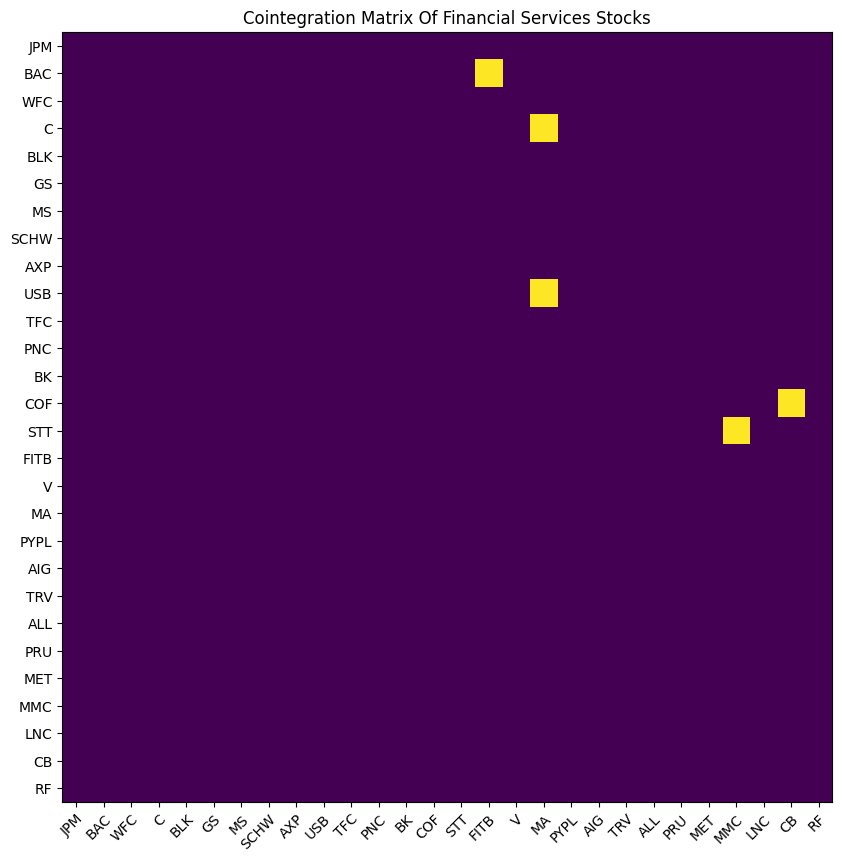

[('ALL', 'MMC'), ('BAC', 'PNC'), ('FITB', 'PNC'), ('MA', 'V'), ('MET', 'TRV')]


In [53]:
pvalues, pairs = cointegration_checker(df)
fig, ax = plt.subplots(figsize=(25, 10))
im = ax.imshow(pvalues <= .02)

ax.set_xticks(np.arange(len(Tickers)))
ax.set_yticks(np.arange(len(Tickers)))

ax.set_xticklabels(Tickers)
ax.set_yticklabels(Tickers)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

ax.set_title("Cointegration Matrix Of Financial Services Stocks")
plt.show()
print(pairs)

# Step 2: Pick 2 Correlated Tickers

#### Test for low p-value


In [64]:
placeholder, pvalue, placeholder2 = coint(df['ALL'][0:252], df['MMC'][0:252])
print("The pvalue of the augmented Engle-Granger two-step cointegration test between $MMC and $ALL is", round(pvalue,5))

placeholder, pvalue, placeholder2 = coint(df['BAC'][0:252], df['PNC'][0:252])
print("The pvalue of the augmented Engle-Granger two-step cointegration test between $PNC and $BAC is", round(pvalue,5))

placeholder, pvalue, placeholder2 = coint(df['FITB'][0:252], df['MMC'][0:252])
print("The pvalue of the augmented Engle-Granger two-step cointegration test between $MMC and $FITB is", round(pvalue,5))

placeholder, pvalue, placeholder2 = coint(df['MA'][0:252], df['V'][0:252])
print("The pvalue of the augmented Engle-Granger two-step cointegration test between $V and $MA is", round(pvalue,5))

placeholder, pvalue, placeholder2 = coint(df['MET'][0:252], df['TRV'][0:252])
print("The pvalue of the augmented Engle-Granger two-step cointegration test between $TRV and $MET is", round(pvalue,5))



The pvalue of the augmented Engle-Granger two-step cointegration test between $MMC and $ALL is 0.95742
The pvalue of the augmented Engle-Granger two-step cointegration test between $PNC and $BAC is 0.49162
The pvalue of the augmented Engle-Granger two-step cointegration test between $MMC and $FITB is 0.9783
The pvalue of the augmented Engle-Granger two-step cointegration test between $V and $MA is 0.19867
The pvalue of the augmented Engle-Granger two-step cointegration test between $TRV and $MET is 0.12456


In [68]:

placeholder, pvalue, placeholder2 = coint(df['COF'][0:252], df['AXP'][0:252])
print("The pvalue of the augmented Engle-Granger two-step cointegration test between $MMC and $FITB is", round(pvalue,5))

placeholder, pvalue, placeholder2 = coint(df['COF'][0:252], df['V'][0:252])
print("The pvalue of the augmented Engle-Granger two-step cointegration test between $V and $MA is", round(pvalue,5))

placeholder, pvalue, placeholder2 = coint(df['CB'][0:252], df['BK'][0:252])
print("The pvalue of the augmented Engle-Granger two-step cointegration test between $TRV and $MET is", round(pvalue,5))

placeholder, pvalue, placeholder2 = coint(df['BAC'][0:252], df['WFC'][0:252])
print("The pvalue of the augmented Engle-Granger two-step cointegration test between $TRV and $MET is", round(pvalue,5))



The pvalue of the augmented Engle-Granger two-step cointegration test between $MMC and $FITB is 0.96007
The pvalue of the augmented Engle-Granger two-step cointegration test between $V and $MA is 0.94859
The pvalue of the augmented Engle-Granger two-step cointegration test between $TRV and $MET is 0.60973
The pvalue of the augmented Engle-Granger two-step cointegration test between $TRV and $MET is 0.4283


Example 1:

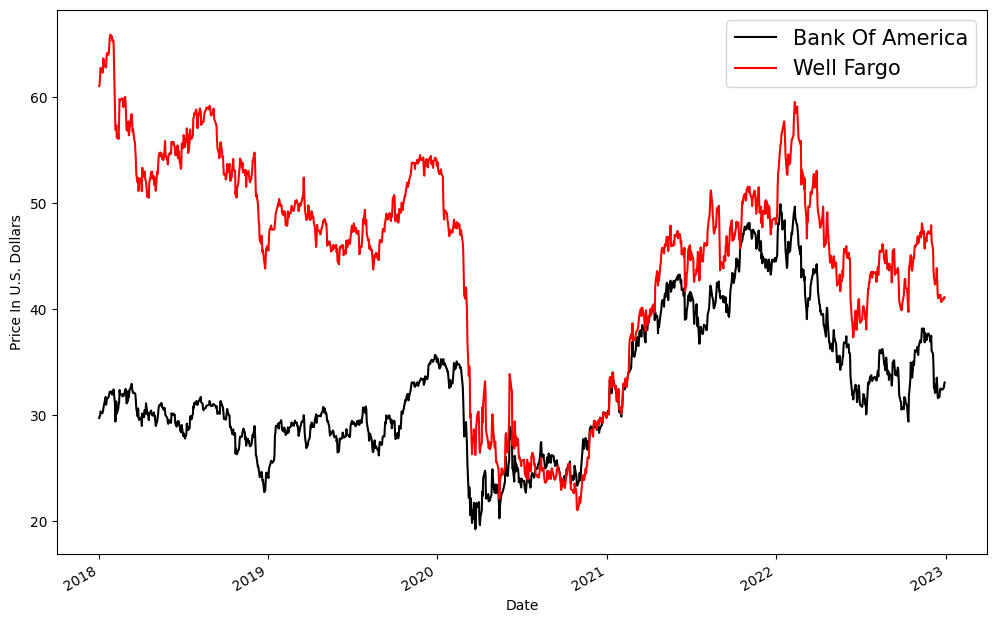

In [73]:
plt.figure(figsize=(12,8))
df['BAC'].plot(color = 'black')
df['WFC'].plot(color = 'red')
plt.legend(['Bank Of America', 'Well Fargo'], prop={'size': 15})
plt.ylabel('Price In U.S. Dollars')
plt.show()

In [67]:
placeholder, pvalue, placeholder2 = coint(df['BAC'][0:252], df['WFC'][0:252])
print("The pvalue of the augmented Engle-Granger two-step cointegration test between $WFC and $BAC is", round(pvalue,5))


The pvalue of the augmented Engle-Granger two-step cointegration test between $WFC and $BAC is 0.4283


Example 2:

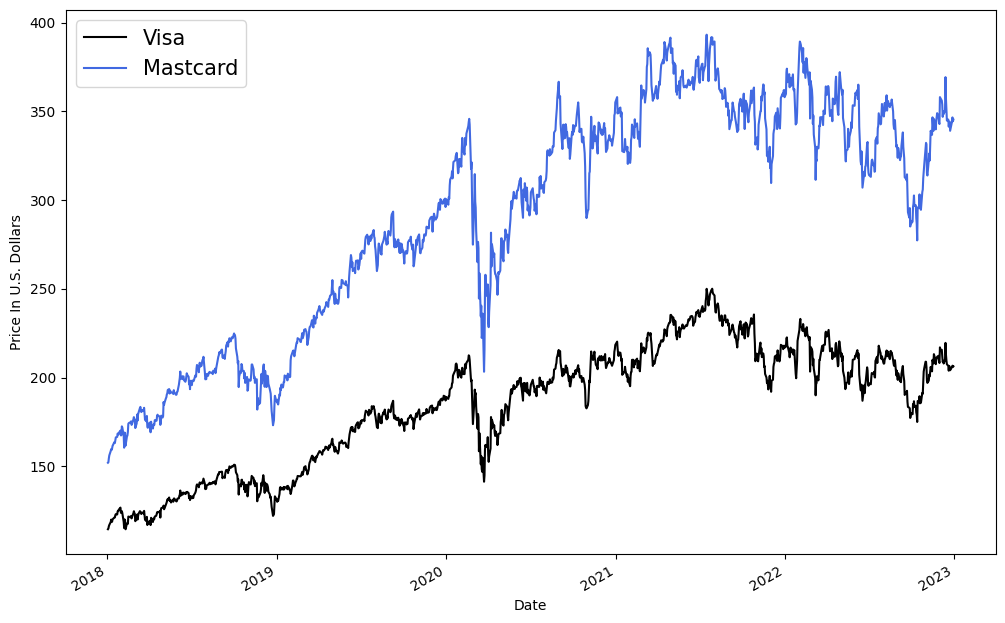

In [69]:
plt.figure(figsize=(12,8))
df['V'].plot(color = 'black')
df['MA'].plot(color = 'royalblue')
plt.legend(['Visa', 'Mastcard'], prop={'size': 15})
plt.ylabel('Price In U.S. Dollars')
plt.show()

In [70]:
placeholder, pvalue, placeholder2 = coint(df['MA'][0:252], df['V'][0:252])
print("The pvalue of the augmented Engle-Granger two-step cointegration test between $V and $MA is", round(pvalue,5))


The pvalue of the augmented Engle-Granger two-step cointegration test between $V and $MA is 0.19867


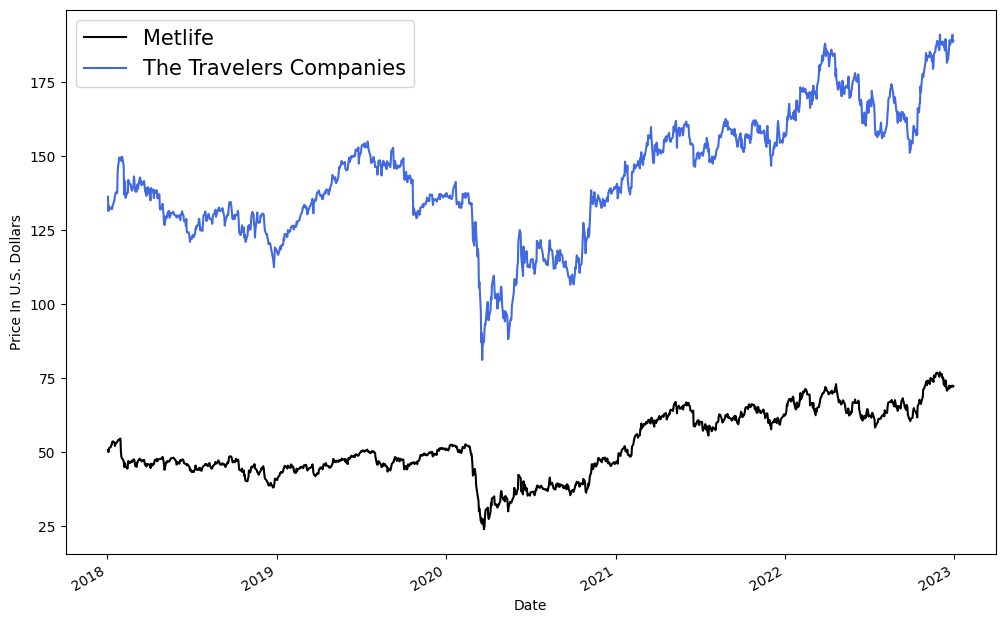

In [71]:
plt.figure(figsize=(12,8))
df['MET'].plot(color = 'black')
df['TRV'].plot(color = 'royalblue')
plt.legend(['Metlife', 'The Travelers Companies'], prop={'size': 15})
plt.ylabel('Price In U.S. Dollars')
plt.show()

In [60]:
placeholder, pvalue, placeholder2 = coint(df['MET'][0:252], df['TRV'][0:252])
print("The pvalue of the augmented Engle-Granger two-step cointegration test between $TRV and $MET is", round(pvalue,5))

The pvalue of the augmented Engle-Granger two-step cointegration test between $V and $MA is 0.12456


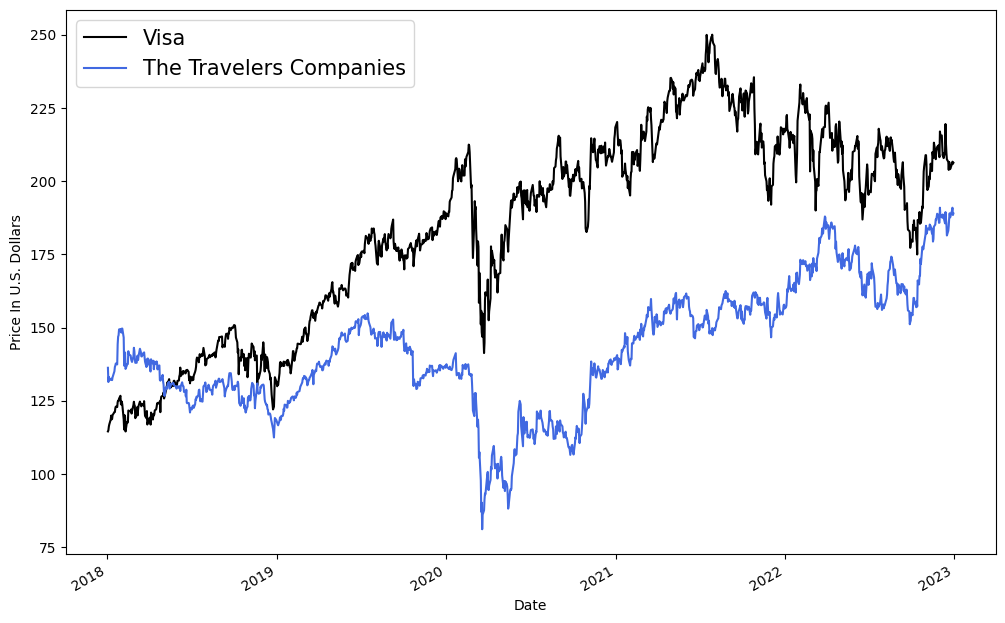

In [75]:
plt.figure(figsize=(12,8))
df['V'].plot(color = 'black')
df['TRV'].plot(color = 'royalblue')
plt.legend(['Visa', 'The Travelers Companies'], prop={'size': 15})
plt.ylabel('Price In U.S. Dollars')
plt.show()

In [76]:
placeholder, pvalue, placeholder2 = coint(df['V'][0:252], df['TRV'][0:252])
print("The pvalue of the augmented Engle-Granger two-step cointegration test between $TRV and $V is", round(pvalue,5))

The pvalue of the augmented Engle-Granger two-step cointegration test between $TRV and $V is 0.16049
